<a href="https://colab.research.google.com/github/amamory/google-colab-repos/blob/master/MNIST_keras2onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conversion from Keras to ONNX Using MNIST Dataset

This example performs a conversion of a 'hand-crafted' CNN fro MNIST dataset, loosely based on lenet CNN. It creates a model in keras, evaluates it, convert it to ONNX format. Finnaly, it loads the created ONNX file to perform predictions and compare it againt keras' predictions. 

In [1]:
import sys
import os
import tensorflow as tf
print("TensorFlow version is "+tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TensorFlow version is 2.2.0


# Preparing the MNIST Dataset

In [2]:
# Get MNIST dataset
mnist = tf.keras.datasets.mnist
# Load its data into training and test vectors
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Collect feature size info
imgSize0=len(x_train[0])
imgSize1=len(x_train[0][0])
numPixels=imgSize0*imgSize1
numTrainImages=len(x_train)
featureShape=(1,imgSize0,imgSize1)

print("Training dataset has "+str(numTrainImages))
print("Testing dataset has "+str(len(x_test)))
print("Feature shape is "+str(featureShape))

Training dataset has 60000
Testing dataset has 10000
Feature shape is (1, 28, 28)


In [3]:
train_labels_count = np.unique(y_train, return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels
#plt.hist(dataframe_train_labels, 'r--', linewidth=1)
#plt.plot(dataframe_train_labels)
#plt.show()
#dataframe_train_labels.hist()

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


In [4]:
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_test_labels = pd.DataFrame({'Label':test_labels_count[0], 'Count':test_labels_count[1]})
dataframe_test_labels

,Label,Count
0,0,980
1,1,1135
2,2,1032
3,3,1010
4,4,982
5,5,892
6,6,958
7,7,1028
8,8,974
9,9,1009


In [5]:
  # mount Google Drive, where the source file is and the generated file will be saved
  # click in the link and copy&paste the authorization code
  # click in the Google Drive icon in the top left corner to allow it only once
  from google.colab import drive
  drive.mount('/content/drive/')

  # there are two operating modes: create a new model or load a existing HDF5
  # when creating a new model, it is required to save it to use it later
  # when load a existing HDF5, it's necessary to have access to it.
  # so in both cases, it's necessary to mount Google Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Building or Loading the CNN Model with Keras

In [6]:
# Clearup everything before running
tf.keras.backend.clear_session()

# select True if it must create a new model, False if it must load it from the h5 file
create_model = False
# how to load and save model
if create_model:
  print ('creating a new model')
  # Clearup everything before running
  tf.keras.backend.clear_session()
  # Create model
  model = tf.keras.models.Sequential()
  # Add layers
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.Dense(8, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
else:
  # load a complete model
  # you might need to edit the soruce location  
  print ('loading an existing model')
  model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/models/mnist-model.h5")

# Build model and print summary
model.build(input_shape=featureShape)
model.summary()

creating a new model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Training Model
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5619 - accuracy: 0.8425
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3320 - accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3059 - accuracy: 0.9145
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2933 - accuracy: 0.9180
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2842 - accuracy: 0.9210
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.9223
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9240
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2698 - accuracy: 0.9250
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9265
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/ste

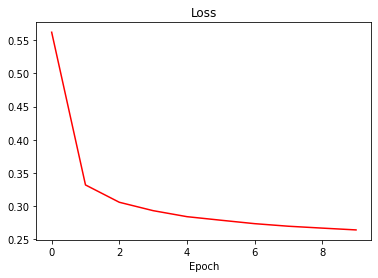

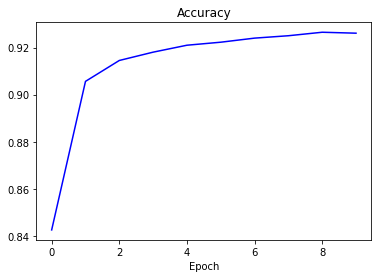

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
if create_model:
  # if the model is just created, them I have to train it
  # Train
  print("Training Model")
  history = model.fit(x_train, y_train, epochs=10)
  plt.plot(history.history["loss"], color='r')
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.show()
  plt.plot(history.history["accuracy"], color='b')
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.show()

# Evaluate the Keras' Model Performance




In [8]:
keras_test_loss, keras_test_acc = model.evaluate(x_test, y_test)

print('Test loss:', keras_test_loss)
print('Test accuracy:', keras_test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.9205
Test loss: 0.27636581659317017
Test accuracy: 0.9204999804496765


In [0]:
if create_model:
  # if the model is just created, them I want to update saved model
  model.save('/content/drive/My Drive/Colab Notebooks/models/mnist-model.h5') 


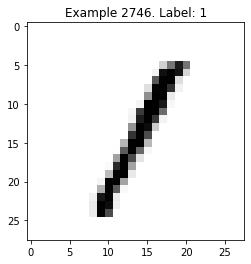

In [10]:
# get a random image index
image_index = int(np.random.randint(0, x_test.shape[0], size=1)[0])
expected_label = y_test[image_index]
digit_image = x_test[image_index]
# and plot it
plt.title('Example %d. Label: %d' % (image_index, expected_label))
plt.imshow(digit_image, cmap='Greys')
plt.show()

In [0]:
# uncomment the following two lines to save sample images with digits
#pil_img = tf.keras.preprocessing.image.array_to_img(digit_image.reshape((imgSize0,imgSize1,1)))
#pil_img.save('/content/drive/My Drive/Colab Notebooks/images/'+str(expected_label)+'.bmp')

In [12]:
# reshape the image for inference/prediction
digit_image = digit_image.reshape(1, imgSize0, imgSize1, 1)

prediction = model.predict(digit_image)
print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

# one suggestion is to place this and the previous cell inside a for loop to perform several inferences

[[4.33310703e-07 9.86823678e-01 2.46923859e-03 4.37109638e-03
  1.12325970e-05 2.63267139e-04 9.55173309e-05 3.25658941e-03
  2.60559935e-03 1.03426995e-04]]
Predicted value: 1
Correct prediction !


plot some correct and incorrent inferences similarly to https://nextjournal.com/gkoehler/digit-recognition-with-keras

# Conversion from Keras to ONNX

Now we know that the keras model is working, let's **convert it to ONNX** format and reevaluate the model again.

In [13]:
# let's install the onnx packages from the source
!pip install --quiet -U onnxruntime
!pip install --quiet -U git+https://github.com/microsoft/onnxconverter-common
!pip install --quiet -U git+https://github.com/onnx/keras-onnx

Now we use Keras2onnx to convert the model to ONNX format and save it.

In [14]:
import keras2onnx
print("keras2onnx version is "+keras2onnx.__version__)
# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, 'mnist-onnx', debug_mode=1)
output_model_path = "/content/drive/My Drive/Colab Notebooks/models/mnist-model.onnx"
# and save the model in ONNX format
keras2onnx.save_model(onnx_model, output_model_path)

tf executing eager_mode: True
tf.keras model eager_mode: False
Processing a keras layer - (dense_1: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense_1/Identity:0
	input : dense/Identity:0
Processing a keras layer - (dense: <class 'tensorflow.python.keras.layers.core.Dense'>)
	output: dense/Identity:0
	input : flatten/Identity:0
Processing a keras layer - (flatten: <class 'tensorflow.python.keras.layers.core.Flatten'>)
	output: flatten/Identity:0
	input : flatten_input:0
var: flatten_input
var: flatten_input:0
var: flatten_input:01
var: flatten/Identity:0
var: dense/Identity:0
var: dense_1/Identity:01
var: dense_1/Identity:0
var: dense_1
Converting the operator (Identity): Identity
Converting the operator (Identity1): Identity
Converting the operator (Identity2): Identity
Converting the operator (dense_1): <class 'tensorflow.python.keras.layers.core.Dense'>
Converting the operator (dense): <class 'tensorflow.python.keras.layers.core.Dense'>
Converting the operator (fl

keras2onnx version is 1.7.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
None


Train Neural Network

In [0]:
# printing the entire model in onnx format. it can be reaaaly long
#print(onnx_model)

# Evaluate the ONNX' Model Performance

Now let's reevaluate the model read from the ONNX format to see if it still work.

In [0]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(output_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [17]:
onnx_predicted_label = sess.run(None, feed)[0].argmax()
print ()
print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")



ONNX predicted value: 1
Correct prediction !
The ONNX's and keras' prediction are matching !
